# Understanding k-Nearest Neighbors (k-NN)

k-Nearest Neighbors is one of the simplest yet effective machine learning algorithms, using proximity to make classifications or predictions. Unlike many algorithms, k-NN is instance-based learning: it doesn't create a model, but instead uses the training data directly for predictions.

## Core Concepts

1. *Distance Metrics*  
k-NN relies on measuring the distance between points. Common distance metrics include:

```python
# Euclidean Distance (most common)
d = √(Σ(xᵢ - yᵢ)²)

# Manhattan Distance
d = Σ|xᵢ - yᵢ|

# Minkowski Distance (generalization)
d = (Σ|xᵢ - yᵢ|ᵖ)^(1/p)
# p=1 gives Manhattan
# p=2 gives Euclidean
```
2. *The 'k' Parameter*  
- Represents the number of neighbors to consider
- Must be an odd number for binary classification (to avoid ties)
- Larger k reduces noise sensitivity but may blur class boundaries

3. *Voting/Averaging*  
- For classification: majority vote among k neighbors
- For regression: average of k neighbors' values
- Can use weighted voting based on distance

## How k-NN Works

1. *For Classification*  
  **Step-by-step process:**
  1. Store all training data points and their labels.
  2. When a new data point `x` needs to be classified:
    - Compute the distance from `x` to every point in the training set.
    - Identify the `k` training points that are closest to `x` (the nearest neighbors).
    - Look at the labels of these `k` neighbors.
    - Assign to `x` the label that appears most frequently among its `k` nearest neighbors (majority vote).

3. *Weighted Voting*  
Often, closer neighbors should have more influence:
```python
# Common weight function
weight = 1 / distance²

# Weighted average for regression
prediction = Σ(weight_i * value_i) / Σ(weight_i)
```

## Implementation Example

Accuracy: 0.60


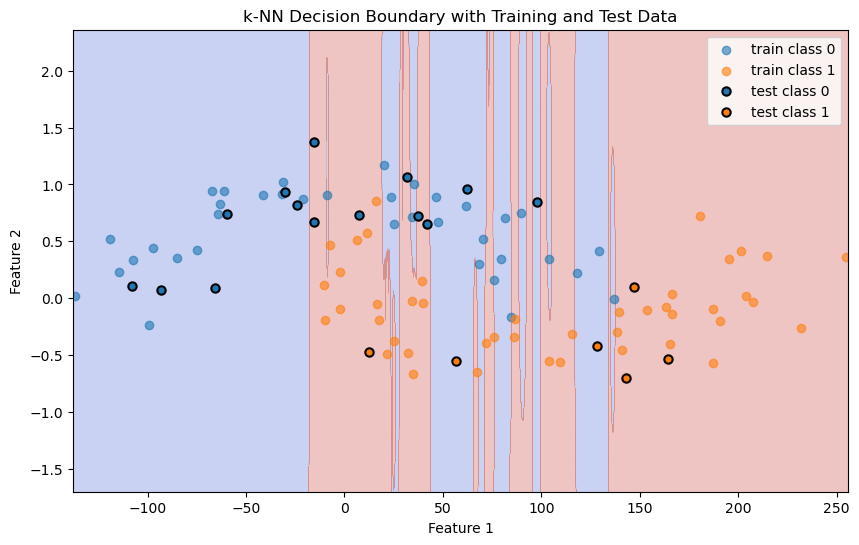

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

# Generate a synthetic dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)
X[:, 0] *= 100  # Scale up the first feature

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train classifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate classifier
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}') 

# plot the training and test sets with the hyperplane
import matplotlib.pyplot as plt

# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary by assigning a color to each point in the mesh grid
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training and test points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='#1f77b4', label='train class 0', alpha=0.6)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='#ff7f0e', label='train class 1', alpha=0.6)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='#1f77b4', label='test class 0', edgecolor='k', linewidth=1.5)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='#ff7f0e', label='test class 1', edgecolor='k', linewidth=1.5)

plt.legend()
plt.title('k-NN Decision Boundary with Training and Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Optimizing k-NN Performance

1. *Feature Scaling*  
Essential because k-NN is distance-based:

Accuracy: 0.95


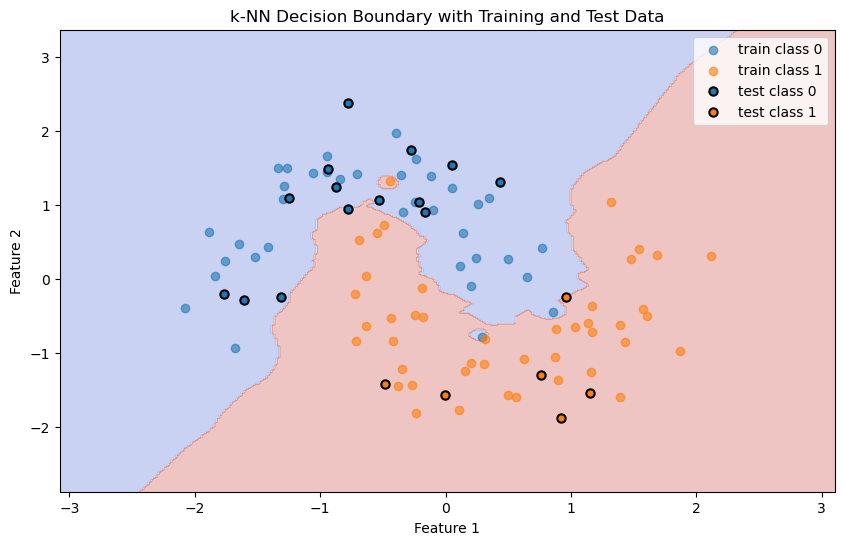

In [4]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train classifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate classifier
accuracy = knn.score(X_test_scaled, y_test)
print(f'Accuracy: {accuracy:.2f}') 

# plot the training and test sets with the hyperplane
import matplotlib.pyplot as plt

# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = np.min((X_train_scaled[:, 0].min(), X_test_scaled[:, 0].min())) - 1, np.max((X_train_scaled[:, 0].max(), X_test_scaled[:, 0].max())) + 1
y_min, y_max = np.min((X_train_scaled[:, 1].min(), X_test_scaled[:, 1].min())) - 1, np.max((X_train_scaled[:, 1].max(), X_test_scaled[:, 1].max())) + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary by assigning a color to each point in the mesh grid
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training and test points
plt.scatter(X_train_scaled[y_train == 0][:, 0], X_train_scaled[y_train == 0][:, 1], color='#1f77b4', label='train class 0', alpha=0.6)
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1], color='#ff7f0e', label='train class 1', alpha=0.6)
plt.scatter(X_test_scaled[y_test == 0][:, 0], X_test_scaled[y_test == 0][:, 1], color='#1f77b4', label='test class 0', edgecolor='k', linewidth=1.5)
plt.scatter(X_test_scaled[y_test == 1][:, 0], X_test_scaled[y_test == 1][:, 1], color='#ff7f0e', label='test class 1', edgecolor='k', linewidth=1.5)

plt.legend()
plt.title('k-NN Decision Boundary with Training and Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

2. *Choosing k*  
Methods to find optimal k:
- Cross-validation with different k values
  * a technique to evaluate the performance of a model by dividing the data into multiple subsets (folds), training the model on some folds, and validating it on the remaining folds. This helps in assessing how the model generalizes to an independent dataset. It's basically likely doing a bunch of extra "mini" random train/test splits and averaging the results.
- Rule of thumb: k ≈ √n, where n is training set size
- Generally test only odd values to avoid ties

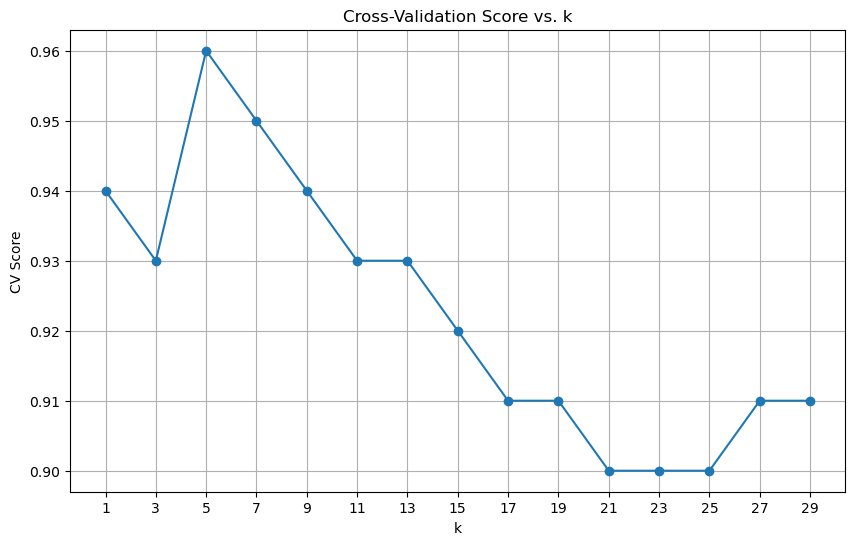

In [5]:
from sklearn.model_selection import cross_val_score

# Example of k selection
scores = []
X_scaled = scaler.fit_transform(X)
for k in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, X_scaled, y, cv=5).mean()
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31, 2), scores, marker='o')
plt.title('Cross-Validation Score vs. k')
plt.xlabel('k')
plt.ylabel('CV Score')
plt.xticks(range(1, 31, 2))
plt.grid(True)
plt.show()

3. *Dimensionality Reduction*  
High dimensions can hurt k-NN (curse of dimensionality):
- Use PCA or t-SNE to reduce dimensions
- Feature selection to remove irrelevant features
- Consider using feature importance from other models

## Handling Special Cases

1. *Dealing with Missing Values*
- Mean/median imputation
- Using specialized distance metrics
- Creating "missing" indicators

2. *Handling Categorical Features*  
  **Options include:**
- One-hot encoding
- Label encoding (if ordinal)
- Special distance metrics for mixed data types

3. *Imbalanced Classes*
- Adjust sample weights
- Oversample minority class
- Undersample majority 

## Advantages and Limitations

*Advantages:*
- Simple to understand and implement
- No training phase (lazy learning)
- Naturally handles multi-class cases
- Can be used for both classification and regression
- No assumptions about data distribution

*Limitations:*
- Computationally expensive for large datasets
- Sensitive to irrelevant features
- Requires feature scaling
- Memory-intensive (stores all training data)
- Curse of dimensionality

## When to Use k-NN

Best suited for cases with:
- Small to medium dataset size
- Low number of dimensions
- Well-separated classes
- Balanced classes
- No missing values
- Similar scales across features